<a href="https://colab.research.google.com/github/BagusDAriAwan/iForest-fraud-detection/blob/master/%5B030720%5D_ULB_percobaan_ROC_PRC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import math
import random as rn
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_style(style="whitegrid")
sb.set_color_codes()
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
from sklearn.preprocessing import Normalizer, MinMaxScaler
from sklearn.cluster import KMeans
import time
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
def confussion_matrik(actual,predict):
    TP,FP,FN,TN = 0,0,0,0
    for i,val in enumerate(actual):
        if val == 0:
            if val == predict[i]:
                TN += 1
            else:
                FP += 1
        if val == 1:
            if val == predict[i]:
                TP += 1
            else:
                FN += 1
    return TP,FP,FN,TN
 
def acc_sens_spec(actual,predict):
    TP,FP,FN,TN = confussion_matrik(actual,predict)
    if (TP+FP+FN+TN) == 0 :
        accuracy = 0 
    else :
        accuracy = (TP+TN)/(TP+FP+FN+TN)
        
# sensitivity
    if (TP+FN) == 0 :
        sensitivity = 0
    else :
        sensitivity = TP/(TP+FN)
        
# specifity    
    if (TN +FP) == 0 :
        specifity = 0
    else :
        specifity = TN/(TN +FP)
        
# precision
    if (TP+FP) == 0 :
        precision = 0
    else :
        precision = TP/(TP+FP)

# recall
    recall = sensitivity

# f1_score
    if (precision+recall) == 0 :
        f1_score = 0
    else :
        f1_score = 2*((precision*recall)/(precision+recall))  
    
    return accuracy,sensitivity,specifity,precision,recall,f1_score
  
def metric_evaluasi(actual,predict):
    TP,FP,FN,TN = confussion_matrik(actual,predict)
# sensitivity
    if (TP+FN) == 0 :
        sensitivity = 0
    else :
        sensitivity = TP/(TP+FN)
# precision
    if (TP+FP) == 0 :
        precision = 0
    else :
        precision = TP/(TP+FP)

# recall
    recall = sensitivity

# f1_score
    if (precision+recall) == 0 :
        f1_score = 0
    else :
        f1_score = 2*((precision*recall)/(precision+recall))  
    
    return precision,recall,f1_score


In [0]:
def convert(y):
    for i in range(y.shape[0]):
        if y[i]==-1:
            y[i]=1;
        else:
            y[i]=0
    return y

In [0]:
def model_evaluate(ifor,X,y):
    ts = time.time()
    y_pred=ifor.predict(X)
    tf = time.time()
    print('time : ', tf-ts)
    y_pred=convert(y_pred)
    
    accuracy,sensitivity,specifity,precision,recall,f1_score = acc_sens_spec(y,y_pred)
    print('accuracy : ',accuracy)
    print('sensitivity : ',sensitivity)
    print('specifity : ', specifity)
    print('precision : ',precision)
    print('recall : ',recall)
    print('f1 score : ',f1_score)
    print('Confusion matrix')
    TP,FP,FN,TN = confussion_matrik(y,y_pred)
    print('TP = ',TP,'FP = ',FP,'FN = ',FN,'TN = ',TN)
    df_cm = pd.DataFrame([[TN,FP],[FN,TP]],
                  ['True Normal','True Fraud'],['Pred Normal','Pred Fraud'])
    plt.figure(figsize = (8,4))
    sb.set(font_scale=1.4)#for label size
    sb.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g')# font size

In [0]:
def iForest(X, ntree, sample, th):
    ifor = IsolationForest(n_estimators=ntree, max_samples=sample, contamination=th, behaviour="new",random_state=1)
#     ifor = IsolationForest(n_estimators=100, max_samples='auto', contamination=0.0039, max_features=1.0, random_state=42, verbose=0)
    ifor.fit(X)
    return ifor

In [0]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc, roc_auc_score

import matplotlib.pyplot as plt

import numpy as np

def get_auc(labels, scores):

    fpr, tpr, thresholds = roc_curve(labels, scores)

    auc_score = roc_auc_score(labels, scores)

    return fpr, tpr, auc_score

def get_aucpr(labels, scores):

    precision, recall, th = precision_recall_curve(labels, scores)

    aucpr_score = np.trapz(recall, precision)

    return precision, recall, aucpr_score
  
  
def roc_aucpr(labels, scores):
    
    fpr, tpr, auc_score = get_auc(labels, scores)
    
    precision, recall, aucpr_score = get_aucpr(labels, scores)
    
    return auc_score, aucpr_score
    

def plot_metric(ax, x, y, x_label, y_label, plot_label, style="-"):

    ax.plot(x, y, style, label=plot_label)

    ax.legend()

    ax.set_ylabel(y_label)

    ax.set_xlabel(x_label)

def prediction_summary(labels, predicted_score, predicted_class, info, plot_baseline=True, axes=None):

    if axes is None:

        axes = [plt.subplot(1, 2, 1), plt.subplot(1, 2, 2)]

    fpr, tpr, auc_score = get_auc(labels, predicted_score)

    plot_metric(axes[0], fpr, tpr, "False positive rate",

                "True positive rate", "{} AUC = {:.4f}".format(info, auc_score))

    if plot_baseline:

        plot_metric(axes[0], [0, 1], [0, 1], "False positive rate",

                "True positive rate", "baseline AUC = 0.5", "r--")

    precision, recall, aucpr_score = get_aucpr(labels, predicted_score)

    plot_metric(axes[1], recall, precision, "Recall",

                "Precision", "{} AUCPR = {:.4f}".format(info, aucpr_score))

    if plot_baseline:

        thr = sum(labels)/len(labels)

        plot_metric(axes[1], [0, 1], [thr, thr], "Recall",

                "Precision", "baseline AUCPR = {:.4f}".format(thr), "r--")

    plt.show()

    return axes

def figure():

    fig_size = 4.5

    f = plt.figure()

    f.set_figheight(fig_size)

    f.set_figwidth(fig_size*2)



In [0]:
from sklearn.metrics import precision_recall_curve
from inspect import signature
from sklearn import metrics
def prec_rec_f1_roc_auc(ifor, Xtest, ytest):
  y_pred=ifor.predict(Xtest)
  y_pred=convert(y_pred)
  yscore = ifor.decision_function(Xtest)
  roc_auc = roc_auc_score(ytest,yscore)
  ap = average_precision_score(ytest, yscore,pos_label=1)
  accuracy,sensitivity,specifity,precision,recall,f1_score = acc_sens_spec(ytest,y_pred)
  fpr, tpr, thresholds = metrics.roc_curve(ytest, yscore, pos_label=1)
  area = metrics.auc(fpr, tpr)
  print('accuracy : ',accuracy)
  print('sensitivity : ',sensitivity)
  print('specifity : ', specifity)
  print('precision : ',precision)
  print('recall : ',recall)
  print('f1 score : ',f1_score)
  print('ROC_AUC_SCORE',roc_auc)
  print('Average Precision', ap)
  print('AUC', area)
  

In [0]:
def eval_model(ifor,X,y):
#     ts = time.time()
    y_pred=ifor.predict(X)
#     tf = time.time()
    y_pred=convert(y_pred)
    
    accuracy,sensitivity,specifity,precision,recall,f1_score = acc_sens_spec(y,y_pred)
    return accuracy,sensitivity,specifity,precision,recall,f1_score

In [0]:
# from sklearn.metrics import confusion_matrix

# def conf_mat_to_pd(df, i):
#   df['tp_'+i] = 

### Data Training

In [0]:
X_raw = pd.read_csv("drive/My Drive/Colab Notebooks/ULB/ULB_preprocessing_train.csv", sep=';')
y = X_raw['Class']
X = X_raw.drop(['Class'], axis=1)


In [0]:
th=y.mean()
th

0.0017254870488152324

### Data Testing

In [0]:
XTest = pd.read_csv("drive/My Drive/Colab Notebooks/ULB/ULB_preprocessing_test.csv", sep=';')
ytest = XTest['Class']
XTest = XTest.drop(['Class'], axis=1)


In [0]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.4, random_state=1, stratify=y)

In [0]:
ntrees = 100
sample=256
ifor = iForest(X_train, ntrees, sample, th)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


In [0]:
## Validasi
ifo_predict = ifor.predict(X_val)
ifo_scores = ifor.score_samples(X_val)
sk_predictions = pd.DataFrame({

    "predicted_class": list(map(lambda x: 1*(x == -1), ifo_predict)),

    "class": y_val,

    "predict": -ifo_scores

})

sk_predictions.head()

,predicted_class,class,predict
85924,0,0,0.403903
144576,0,0,0.363685
174511,0,0,0.378609
8822,0,0,0.417522
4050,0,0,0.374702


In [0]:
-ifo_scores

array([0.40390306, 0.3636854 , 0.37860916, ..., 0.43119794, 0.40536016,
       0.4806271 ])

In [0]:
sk_predictions[sk_predictions['predicted_class']==1].head()

,predicted_class,class,predict
105005,1,0,0.737735
181329,1,1,0.687405
10628,1,0,0.737247
187037,1,0,0.714781
8431,1,0,0.694541


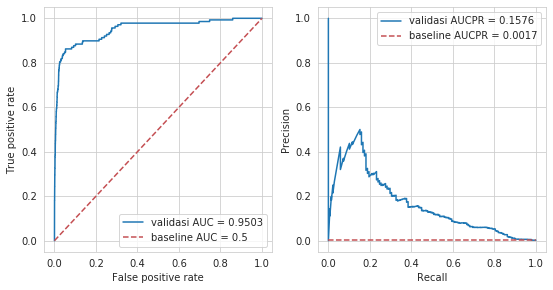

In [0]:
figure()
axes = prediction_summary(

    sk_predictions["class"], sk_predictions["predict"], sk_predictions["predicted_class"], "validasi")

In [0]:
## test
iftest_predict = ifor.predict(XTest)
iftest_scores = ifor.score_samples(XTest)
iftest_predictions = pd.DataFrame({

    "predicted_class": list(map(lambda x: 1*(x == -1), iftest_predict)),

    "class": ytest,

    "predict": -iftest_scores

})

iftest_predictions.head()

,predicted_class,class,predict
0,0,0,0.410704
1,0,0,0.383973
2,0,0,0.624955
3,0,0,0.373262
4,0,0,0.415957


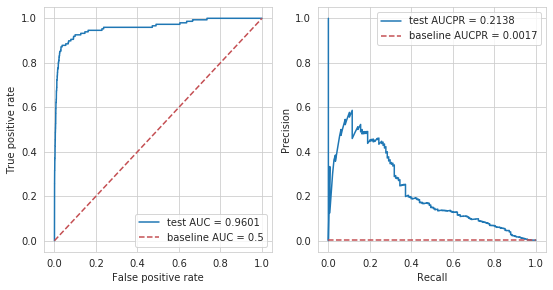

In [0]:
figure()
axes = prediction_summary(

    iftest_predictions["class"], iftest_predictions["predict"], iftest_predictions["predicted_class"],'test')

# Percobaan 1 - Split Rasio

In [0]:
rasios = [0.1,0.2,0.3,0.4]
ntree = 100
sub_sample = 256
hasil1 = []
# th=len(y)/len(X)
for rasio in rasios:
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=rasio, random_state=1, stratify=y)
  
  th = y_train.mean()
  
  training = (1-rasio)*100
  
  test = rasio*100
  
  ifor = iForest(X_train,ntree,sub_sample,th)
  
  y_pred = ifor.predict(X_val)
  
  y_pred = np.array(convert(y_pred))
  
  ifo_scores = ifor.score_samples(X_val)
  
  ifo_scores = -ifo_scores
  
  roc_auc, aucpr = roc_aucpr(y_val, ifo_scores)
  
  TP,FP,FN,TN = confussion_matrik(y_val,y_pred)

  FPR = FP/(TN+FP)
  
  precision,recall,f1_score = metric_evaluasi(y_val,y_pred)
  
  result = [training,test,precision,recall,FPR,f1_score, roc_auc, aucpr]
   
  hasil1.append(result)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


In [0]:
hasil_percobaan1 = pd.DataFrame(data= hasil1, columns=['Training_Rasio','Test_Rasio','Precision','TPR','FPR','F1_Score', 'ROC_AUC', 'AUCPR'])
hasil_percobaan1

,Training_Rasio,Test_Rasio,Precision,TPR,FPR,F1_Score,ROC_AUC,AUCPR
0,90.0,10.0,0.137931,0.117647,0.001256,0.126984,0.956929,0.082776
1,80.0,20.0,0.228571,0.231884,0.001357,0.230216,0.963744,0.148016
2,70.0,30.0,0.222222,0.194175,0.001172,0.207254,0.955398,0.115973
3,60.0,40.0,0.272727,0.239130,0.001105,0.254826,0.950279,0.157578


In [0]:
maxi = hasil_percobaan1['F1_Score'].max()
terbaik1 = hasil_percobaan1[hasil_percobaan1['F1_Score']==maxi]
terbaik1

,Training_Rasio,Test_Rasio,Precision,TPR,FPR,F1_Score,ROC_AUC,AUCPR
3,60.0,40.0,0.272727,0.23913,0.001105,0.254826,0.950279,0.157578


In [0]:
best_rasio = terbaik1['Test_Rasio']
best_rasio = int(best_rasio)
best_rasio = best_rasio/100
print('Rasio Train : Test terbaik =>',1-best_rasio,':',best_rasio)

Rasio Train : Test terbaik => 0.6 : 0.4


### Grafik ROC_AUC dan Precision_Recall pada data Validasi

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


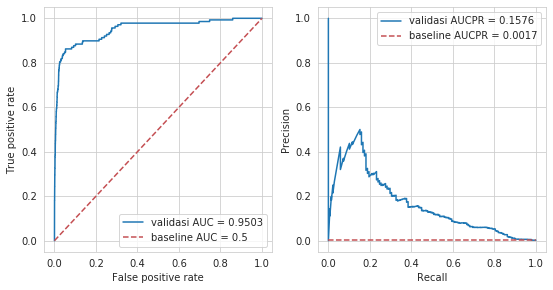

In [0]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=best_rasio, random_state=1, stratify=y)
  
th = y_train.mean()

ifor1 = iForest(X_train,ntree,sub_sample,th)

y_pred = ifor1.predict(X_val)

y_pred = np.array(convert(y_pred))

ifval_scores = ifor1.score_samples(X_val)

val_predictions = pd.DataFrame({

    "predicted_class": y_pred,

    "class": y_val,

    "predict": -ifval_scores

})

figure()
axes = prediction_summary(

    val_predictions["class"], val_predictions["predict"], val_predictions["predicted_class"],'validasi')

In [0]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(val_predictions["class"],val_predictions["predicted_class"]).ravel()
pd.DataFrame([[tn,fp,fn,tp]],columns=['TN','FP','FN','TP'])

,TN,FP,FN,TP
0,79520,88,105,33


### Grafik ROC_AUC dan Precision_Recall pada data Testing

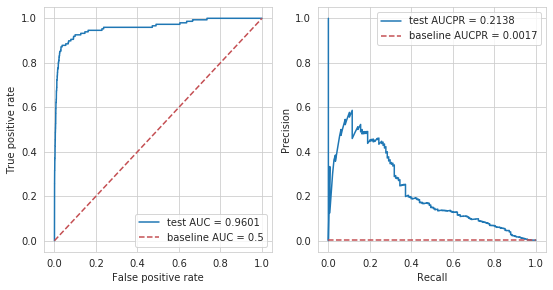

In [0]:
testing1 = []
iftest_predict = ifor1.predict(XTest)

iftest_scores = ifor1.score_samples(XTest)

roc_auc, aucpr = roc_aucpr(ytest, -iftest_scores)

precision,recall,f1_score = metric_evaluasi(ytest, np.array(convert(iftest_predict)))

TP,FP,FN,TN = confussion_matrik(y_val,y_pred)

FPR = FP/(TN+FP)

result1 = [1-best_rasio,best_rasio,precision,recall,FPR,f1_score, roc_auc, aucpr]

test_predictions = pd.DataFrame({

    "predicted_class": list(map(lambda x: 1*(x == -1), iftest_predict)),

    "class": ytest,

    "predict": -iftest_scores

})
testing1.append(result1)

figure()
axes = prediction_summary(
    test_predictions["class"], test_predictions["predict"], test_predictions["predicted_class"],'test')

In [0]:
tn, fp, fn, tp = confusion_matrix(test_predictions["class"],test_predictions["predicted_class"]).ravel()
pd.DataFrame([[tn,fp,fn,tp]],columns=['TN','FP','FN','TP'])

,TN,FP,FN,TP
0,85295,0,148,0


In [0]:
hasil_testing1 = pd.DataFrame(data= testing1, columns=['Training_Rasio','Test_Rasio','Precision','TPR','FPR','F1_Score', 'ROC_AUC', 'AUCPR'])
hasil_testing1

,Training_Rasio,Test_Rasio,Precision,TPR,FPR,F1_Score,ROC_AUC,AUCPR
0,0.6,0.4,0.338235,0.310811,0.001105,0.323944,0.960143,0.213812


# Percobaan 2 - Seleksi Fitur
berdasarkan percobaan 1 train rasio terbaik adalah 60%, maka dilakukan percobaan 2 dengan train rasio dan variasi seleksi fitur dimana fitur terbaik telah didapat sebelumnya yaitu:
1) V14 : 0.191396, 2) V4 : 0.156735, 3) V17 : 0.154208, 4) V12 : 0.153089, 5) V11 : 0.075608, 6) V2 : 0.051632, 7) V10 : 0.038917, 8) V7 : 0.015483, 9) V20 : 0.014762, 10) V21 : 0.013873, 11) V19 : 0.012698, 12) V8 : 0.011657, 13) V6 : 0.010132, 14) V27 : 0.009422, 15) V3 : 0.007821, 16) V26 : 0.007501, 17) V9 : 0.007076, 18) Amount : 0.007075, 19) V13 : 0.006597, 20) V15 : 0.006509, 21) V23 : 0.006476, 22) V22 : 0.006006, 23) V1 : 0.005765, 24) V24 : 0.005645, 25) V28 : 0.005104, 26) V18 : 0.004795, 27) V16 : 0.004732, 28) V25 : 0.004156, 29) V5 :0.003216, 30) Time : 0.001916

In [0]:
best_fitur = ['V14', 'V4', 'V17', 'V12', 'V11', 'V2', 'V10', 'V7', 'V20', 'V21', 'V19', 'V8', 'V6', 'V27', 'V3','V26','V9','Amount','V13','V15','V23','V22','V1','V24','V28','V18','V16','V25','V5','Time']
best_fitur[:3]

['V14', 'V4', 'V17']

In [0]:
X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
146666,78498.0,-0.502755,0.188666,-0.310252,0.150411,2.424864,3.878252,0.434310,0.892622,-0.499042,-0.340246,-0.686138,-0.121524,-0.213778,0.175293,-0.041179,-0.454406,-0.276424,0.243821,1.139519,0.400779,0.030133,-0.117841,0.126388,0.998568,0.005019,-0.336592,0.137597,0.167856,126.98
37694,118053.0,1.732166,-0.772691,-1.441021,-0.076128,0.508067,1.081426,-0.224584,0.332417,0.926579,-0.203125,0.740169,1.069866,-0.559331,0.449576,-0.113316,-0.971426,0.274855,-1.223960,-0.213032,-0.142388,-0.022636,0.032540,0.130717,-1.624339,-0.275084,0.014721,-0.000179,-0.067533,100.00
38393,168568.0,1.956946,-0.310638,-1.276120,0.337052,-0.047480,-0.659073,-0.031063,-0.104195,0.366549,0.367669,0.580609,0.226534,-0.996805,0.785931,0.178449,0.421036,-0.801430,0.414740,0.014852,-0.191886,0.188797,0.488669,0.043652,-0.380817,-0.070321,0.391003,-0.074177,-0.070261,42.98
173330,33976.0,0.990182,-0.053769,0.263690,1.280483,-0.281139,-0.377423,0.164353,-0.065482,0.029121,-0.015365,-0.262049,0.052303,-0.348442,0.456461,1.244467,-0.111094,-0.169239,-0.449806,-0.863743,0.013184,0.156275,0.280870,-0.166172,0.085264,0.549844,-0.261117,0.012580,0.035939,108.00
142612,62155.0,-1.080161,-1.213746,1.974065,-2.203755,-1.063698,-1.173169,0.033453,-0.184253,-2.549609,0.522503,-0.200400,-0.413675,1.548135,-0.701979,-0.075468,-0.117625,0.185186,-0.169001,-1.059709,0.232410,-0.109093,-0.465466,0.502660,0.661659,-0.064474,-0.600733,0.025647,0.135515,177.70


In [0]:
X_val.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
85924,137092.0,1.924353,0.575341,-0.958837,3.509359,0.958303,0.649692,0.203940,0.078958,-1.226021,1.572164,0.084439,0.548903,0.235285,0.334186,-1.809282,0.958076,-1.075206,-0.207605,-0.801489,-0.231008,-0.214244,-0.625048,0.265238,0.219950,-0.093669,-0.291357,-0.046431,-0.053290,6.02
144576,34044.0,1.009349,-0.058604,0.437737,1.373641,-0.311653,0.027110,-0.019541,0.152865,0.136556,0.044620,1.203490,0.847524,-1.069360,0.450562,-0.712165,-0.540474,0.135417,-0.437250,-0.165265,-0.135832,-0.015658,-0.000932,-0.083907,0.224880,0.559480,-0.345480,0.021372,0.014944,58.92
174511,60893.0,1.017121,-0.806732,0.895210,-1.164497,-1.361611,-0.603246,-0.551444,0.005059,1.796572,-1.276902,0.249518,1.271983,0.575240,-0.264433,1.509792,-0.795129,0.290204,-0.549999,0.226900,0.108715,0.095506,0.361957,-0.038604,0.472755,0.232071,-0.029788,0.048493,0.043987,100.00
8822,79972.0,-0.455815,-0.206672,2.130434,-0.454155,-1.857334,0.650322,-0.306089,0.157228,-0.059669,0.208823,-0.755930,-0.696615,-0.693055,-1.099963,-0.801061,-0.223200,1.509857,-1.635142,1.285166,-0.008089,0.359277,1.364004,-0.103755,0.483681,-0.483004,-0.006216,0.037234,0.121178,115.00
4050,27690.0,1.236986,-0.166139,0.090760,0.185506,-0.026162,0.335124,-0.199717,0.052244,0.415055,-0.165855,0.044547,1.217414,0.853948,-0.229043,-1.040054,0.109025,-0.583498,0.168534,1.036618,0.035273,-0.099764,-0.077329,-0.265990,-0.738330,0.682727,0.721433,-0.037730,-0.009590,29.00


In [0]:
fiturs = []
hasil2 = []
ntree = 100
sub_sample = 256
for fitur in range(1,11):
  X_train2 = X_train[best_fitur[:fitur]]
  
  X_val2 = X_val[best_fitur[:fitur]]
  
  th = y_train.mean()
  
  ifor = iForest(X_train2,ntree,sub_sample,th)
  
  y_pred = ifor.predict(X_val2)
  
  y_pred = np.array(convert(y_pred))
  
  ifo_scores = ifor.score_samples(X_val2)
  
  ifo_scores = -ifo_scores
  
  roc_auc, aucpr = roc_aucpr(y_val, ifo_scores)
  
  precision,recall,f1_score = metric_evaluasi(y_val,y_pred)

  TP,FP,FN,TN = confussion_matrik(y_val,y_pred)

  FPR = FP/(TN+FP)
  
  result = [fitur,precision,recall,FPR,f1_score, roc_auc, aucpr]
  
  hasil2.append(result)
  
  print ('==> Fitur : ', fitur, 'terbaik done. .')

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


==> Fitur :  1 terbaik done. .


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


==> Fitur :  2 terbaik done. .


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


==> Fitur :  3 terbaik done. .


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


==> Fitur :  4 terbaik done. .


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


==> Fitur :  5 terbaik done. .


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


==> Fitur :  6 terbaik done. .


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


==> Fitur :  7 terbaik done. .


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


==> Fitur :  8 terbaik done. .


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


==> Fitur :  9 terbaik done. .


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


==> Fitur :  10 terbaik done. .


In [0]:
hasil_percobaan2 = pd.DataFrame(data= hasil2, columns=['Jumlah Fitur','Precision','TPR','FPR','F1_Score', 'ROC_AUC', 'AUCPR'])
hasil_percobaan2

,Jumlah Fitur,Precision,TPR,FPR,F1_Score,ROC_AUC,AUCPR
0,1,0.616000,0.557971,0.000603,0.585551,0.942206,0.546269
1,2,0.588710,0.528986,0.000641,0.557252,0.965031,0.506081
2,3,0.616541,0.594203,0.000641,0.605166,0.968412,0.529786
3,4,0.723077,0.681159,0.000452,0.701493,0.967445,0.629044
4,5,0.725352,0.746377,0.000490,0.735714,0.970386,0.637907
5,6,0.666667,0.652174,0.000565,0.659341,0.973078,0.550999
6,7,0.550000,0.557971,0.000791,0.553957,0.966702,0.461982
7,8,0.584507,0.601449,0.000741,0.592857,0.971321,0.527721
8,9,0.431034,0.362319,0.000829,0.393701,0.971417,0.302686
9,10,0.379845,0.355072,0.001005,0.367041,0.973214,0.295904


In [0]:
maxi = hasil_percobaan2['F1_Score'].max()
terbaik2 = hasil_percobaan2[hasil_percobaan2['F1_Score']==maxi]
terbaik2

,Jumlah Fitur,Precision,TPR,FPR,F1_Score,ROC_AUC,AUCPR
4,5,0.725352,0.746377,0.00049,0.735714,0.970386,0.637907


In [0]:
jml_fitur = terbaik2['Jumlah Fitur']
jml_fitur = int(jml_fitur)
jml_fitur

5

### Grafik ROC_AUC dan Precision_Recall pada data Validasi

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


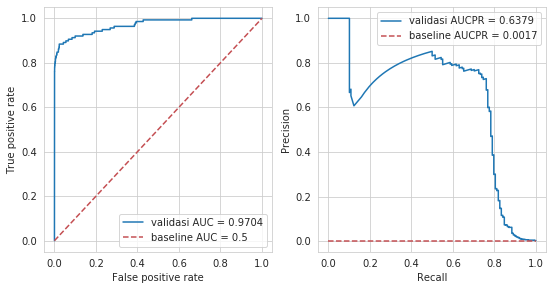

In [0]:
# X_new = X[best_fitur[:jml_fitur]]
  
# X_train, X_val, y_train, y_val = train_test_split(X_new, y, test_size=best_rasio, random_state=1, stratify=y)
X_train = X_train[best_fitur[:jml_fitur]]

X_val = X_val[best_fitur[:jml_fitur]]

th = y_train.mean()

ifor2 = iForest(X_train,ntree,sub_sample,th)

y_pred = ifor2.predict(X_val)

y_pred = np.array(convert(y_pred))

ifval_scores = ifor2.score_samples(X_val)

ifval_scores = -ifval_scores

val_predictions = pd.DataFrame({

    "predicted_class": y_pred,

    "class": y_val,

    "predict": ifval_scores

})

figure()
axes = prediction_summary(

    val_predictions["class"], val_predictions["predict"], val_predictions["predicted_class"],'validasi')

### Grafik ROC_AUC dan Precision_Recall pada data Testing

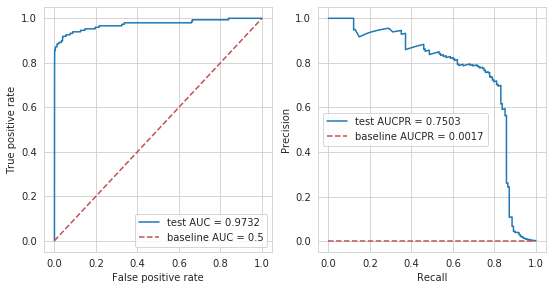

In [0]:
testing2 = []
Xtest_new = XTest[best_fitur[:jml_fitur]]

iftest_predict = ifor2.predict(Xtest_new)

iftest_scores = ifor2.score_samples(Xtest_new)

roc_auc, aucpr = roc_aucpr(ytest, -iftest_scores)
  
precision,recall,f1_score = metric_evaluasi(ytest,np.array(convert(iftest_predict)))

TP,FP,FN,TN = confussion_matrik(y_val,y_pred)

FPR = FP/(TN+FP)

result2 = [jml_fitur,precision,recall,FPR,f1_score, roc_auc, aucpr]

testing2.append(result2)

test_predictions = pd.DataFrame({

    "predicted_class": list(map(lambda x: 1*(x == -1), iftest_predict)),

    "class": ytest,

    "predict": -iftest_scores

})

figure()
axes = prediction_summary(
    test_predictions["class"], test_predictions["predict"], test_predictions["predicted_class"],'test')

In [0]:
hasil_testing2 = pd.DataFrame(data= testing2, columns=['Jumlah Fitur','Precision','TPR','FPR','F1_Score', 'ROC_AUC', 'AUCPR'])
hasil_testing2

,Jumlah Fitur,Precision,TPR,FPR,F1_Score,ROC_AUC,AUCPR
0,5,0.722222,0.790541,0.00049,0.754839,0.973239,0.750256


# Percobaan 3 - Jumlah Anomali pada Training

In [0]:
X3_train = X_train.join(y_train)
X3_train = X3_train.reset_index()
X3_train = X3_train.drop(['index'],axis=1)
train3_normal = X3_train[X3_train['Class']==0]
train3_fraud = X3_train[X3_train['Class']==1]

In [0]:
X3_train.head()

,V14,V4,V17,V12,V11,Class
0,0.175293,0.150411,-0.276424,-0.121524,-0.686138,0
1,0.449576,-0.076128,0.274855,1.069866,0.740169,0
2,0.785931,0.337052,-0.801430,0.226534,0.580609,0
3,0.456461,1.280483,-0.169239,0.052303,-0.262049,0
4,-0.701979,-2.203755,0.185186,-0.413675,-0.200400,0


In [0]:
X_val.head()

,V14,V4,V17,V12,V11
85924,0.334186,3.509359,-1.075206,0.548903,0.084439
144576,0.450562,1.373641,0.135417,0.847524,1.203490
174511,-0.264433,-1.164497,0.290204,1.271983,0.249518
8822,-1.099963,-0.454155,1.509857,-0.696615,-0.755930
4050,-0.229043,0.185506,-0.583498,1.217414,0.044547


In [0]:
# X_train

In [0]:
# data_normal = X_raw[X_raw['Class']==0]
# data_fraud = X_raw[X_raw['Class']==1]

In [0]:
# print('jumlah data normal :',len(data_normal), 'jumlah data fraud :', len(data_fraud))

In [0]:
# X_normal = data_normal.drop(['Class'], axis=1)
# y_normal = data_normal['Class']

# X_fraud = data_fraud.drop(['Class'], axis=1)
# y_fraud = data_fraud['Class']

In [0]:
# Xtrain_normal, Xtest_normal, ytrain_normal, ytest_normal = train_test_split(X_normal, y_normal, test_size=best_rasio, random_state=1, stratify=y_normal)
# Xtrain_fraud, Xtest_fraud, ytrain_fraud, ytest_fraud = train_test_split(X_fraud, y_fraud, test_size=best_rasio, random_state=1, stratify=y_fraud)

In [0]:
# print('jumlah data normal :',len(Xtest_normal), 'jumlah data fraud :', len(Xtest_fraud))

In [0]:
# print('jumlah data normal :',len(Xtrain_normal), 'jumlah data fraud :', len(Xtrain_fraud))

In [0]:
# X_test = Xtest_normal.append(Xtest_fraud)
# X_test3 = X_test.sort_index()
# X_test3 = X_test3[best_fitur[:jml_fitur]]
# y_test = ytest_normal.append(ytest_fraud)
# y_test3 = y_test.sort_index()

In [0]:
# # 100% fraud
# X_train1 = Xtrain_normal.append(Xtrain_fraud)
# X_train1 = X_train1.sort_index()
# X_train1 = X_train1[best_fitur[:4]]
# th_default1 = len(Xtrain_fraud)/len(X_train1)

# # 75% fraud
# fraud75 = Xtrain_fraud.sample(frac=0.75, random_state=1)
# X_train2 = Xtrain_normal.append(fraud75)
# X_train2 = X_train2.sort_index()
# X_train2 = X_train2[best_fitur[:4]]
# th_default2 = len(fraud75)/len(X_train2)

# 50% fraud
# fraud5 = Xtrain_fraud.sample(frac=0.5, random_state=1)
# X_train3 = Xtrain_normal.append(fraud5)
# X_train3 = X_train3.sort_index()
# X_train3 = X_train3[best_fitur[:4]]
# th_default3 = len(fraud5)/len(X_train3)

# 25% fraud
# fraud25 = Xtrain_fraud.sample(frac=0.25, random_state=1)
# X_train4 = Xtrain_normal.append(fraud25)
# X_train4 = X_train4.sort_index()
# X_train4 = X_train4[best_fitur[:4]]
# th_default4 = len(fraud25)/len(X_train4)

# 0% fraud
# X_train5 = Xtrain_normal
# X_train5 = X_train5[best_fitur[:4]]
# th_default5 = 0


In [0]:
# temp = int(df_['Class'].value_counts()[1]*0.1)
# temp

In [0]:
# X123 = X3_train[rowMeans(X3_train['Class'] == 0) < 0.75,]


In [0]:
# X_train3.head()

In [0]:
ntree = 100
sub_sample = 256
hasil3=[]
fraud = [1,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1,0.05,0.01,0]
for rasio in fraud:
  Xfraud = train3_fraud.sample(frac=rasio, random_state=1)
  
  X_train3 = train3_normal.append(Xfraud)
  
  X_train3 = X_train3.sort_index()
  
  y_train3 = X_train3['Class']
  
  X_train3 = X_train3.drop(['Class'], axis=1)
  
  th_default = y_train3.mean()
  
  ifor = iForest(X_train3,ntree,sub_sample,th_default)
  
  y_pred = ifor.predict(X_val)
  
  y_pred = np.array(convert(y_pred))
  
  ifo_scores = ifor.score_samples(X_val)
  
  ifo_scores = -ifo_scores
  
  roc_auc, aucpr = roc_aucpr(y_val, ifo_scores)

  TP,FP,FN,TN = confussion_matrik(y_val,y_pred)

  FPR = FP/(TN+FP)
  
  precision,recall,f1_score = metric_evaluasi(y_val,y_pred)
  anomali = rasio*100
  result = [anomali,precision,recall,FPR,f1_score, roc_auc, aucpr]
  hasil3.append(result)
  print ('==> Rasio Anomali :', anomali,'% pada Training done. .')
  

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


==> Rasio Anomali : 100 % pada Training done. .


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


==> Rasio Anomali : 90.0 % pada Training done. .


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


==> Rasio Anomali : 80.0 % pada Training done. .


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


==> Rasio Anomali : 70.0 % pada Training done. .


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


==> Rasio Anomali : 60.0 % pada Training done. .


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


==> Rasio Anomali : 50.0 % pada Training done. .


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


==> Rasio Anomali : 40.0 % pada Training done. .


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


==> Rasio Anomali : 30.0 % pada Training done. .


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


==> Rasio Anomali : 20.0 % pada Training done. .


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


==> Rasio Anomali : 10.0 % pada Training done. .


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


==> Rasio Anomali : 5.0 % pada Training done. .


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


==> Rasio Anomali : 1.0 % pada Training done. .


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


==> Rasio Anomali : 0 % pada Training done. .


In [0]:
hasil_percobaan3 = pd.DataFrame(data= hasil3, columns=['Rasio Anomaly','Precision','TPR','FPR','F1_Score', 'ROC_AUC', 'AUCPR'])
hasil_percobaan3

,Rasio Anomaly,Precision,TPR,FPR,F1_Score,ROC_AUC,AUCPR
0,100.0,0.725352,0.746377,0.000490,0.735714,0.970386,0.637907
1,90.0,0.736842,0.710145,0.000440,0.723247,0.970436,0.609360
2,80.0,0.748092,0.710145,0.000415,0.728625,0.970553,0.629409
3,70.0,0.779528,0.717391,0.000352,0.747170,0.970440,0.636297
4,60.0,0.800000,0.695652,0.000301,0.744186,0.969220,0.642921
5,50.0,0.780702,0.644928,0.000314,0.706349,0.970437,0.604922
6,40.0,0.776699,0.579710,0.000289,0.663900,0.970642,0.603263
7,30.0,0.802632,0.442029,0.000188,0.570093,0.969504,0.607074
8,20.0,0.841463,0.500000,0.000163,0.627273,0.971482,0.646339
9,10.0,0.773585,0.297101,0.000151,0.429319,0.971940,0.631566


In [0]:
terbaik2

,Jumlah Fitur,Precision,TPR,FPR,F1_Score,ROC_AUC,AUCPR
4,5,0.725352,0.746377,0.00049,0.735714,0.970386,0.637907


In [0]:
maxi = hasil_percobaan3['F1_Score'].max()
terbaik3 = hasil_percobaan3[hasil_percobaan3['F1_Score']==maxi]
terbaik3

,Rasio Anomaly,Precision,TPR,FPR,F1_Score,ROC_AUC,AUCPR
3,70.0,0.779528,0.717391,0.000352,0.74717,0.97044,0.636297


In [0]:
rasio_anomaly = terbaik3['Rasio Anomaly']
rasio_anomaly = int(rasio_anomaly)
print('Rasio Fraud pada training:',rasio_anomaly)

Rasio Fraud pada training: 70


### Grafik ROC_AUC dan Precision_Recall pada data Validasi

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


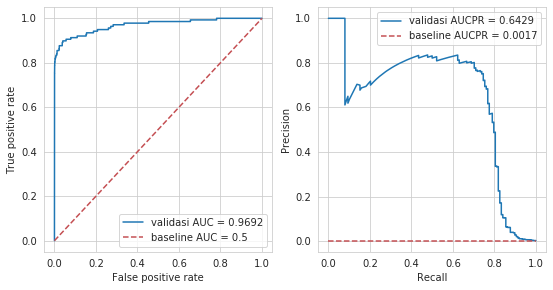

In [0]:
rasio = rasio_anomaly/100

Xfraud = train3_fraud.sample(frac=0.6, random_state=1)
  
X_train3 = train3_normal.append(Xfraud)

X_train3 = X_train3.sort_index()

y_train3 = X_train3['Class']

X_train3 = X_train3.drop(['Class'], axis=1)

th_default = y_train3.mean()

ifor3 = iForest(X_train3,ntree,sub_sample,th_default)

y_pred = ifor3.predict(X_val)

y_pred = np.array(convert(y_pred))

ifval_scores = ifor3.score_samples(X_val)

ifval_scores = -ifval_scores

val_predictions = pd.DataFrame({

    "predicted_class": y_pred,

    "class": y_val,

    "predict": ifval_scores

})

figure()
axes = prediction_summary(

    val_predictions["class"], val_predictions["predict"], val_predictions["predicted_class"],'validasi')

### Grafik ROC_AUC dan Precision_Recall pada data Testing

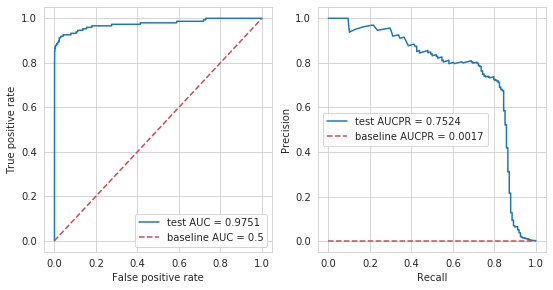

In [0]:
testing3 = []
iftest_predict = ifor3.predict(Xtest_new)

iftest_scores = ifor3.score_samples(Xtest_new)

roc_auc, aucpr = roc_aucpr(ytest, -iftest_scores)
  
precision,recall,f1_score = metric_evaluasi(ytest,np.array(convert(iftest_predict)))

TP,FP,FN,TN = confussion_matrik(y_val,y_pred)

FPR = FP/(TN+FP)

result3 = [rasio_anomaly,precision,recall,FPR,f1_score, roc_auc, aucpr]
testing3.append(result3)

test_predictions = pd.DataFrame({

    "predicted_class": list(map(lambda x: 1*(x == -1), iftest_predict)),

    "class": ytest,

    "predict": -iftest_scores

})

figure()
axes = prediction_summary(
    test_predictions["class"], test_predictions["predict"], test_predictions["predicted_class"],'test')

In [0]:
hasil_testing3 = pd.DataFrame(data= testing3, columns=['Rasio Anomaly','Precision','TPR','FPR','F1_Score', 'ROC_AUC', 'AUCPR'])
hasil_testing3

,Rasio Anomaly,Precision,TPR,FPR,F1_Score,ROC_AUC,AUCPR
0,70,0.796992,0.716216,0.000301,0.754448,0.975069,0.752423


In [0]:
X_train3.head()

,V14,V4,V17,V12,V11
0,0.175293,0.150411,-0.276424,-0.121524,-0.686138
1,0.449576,-0.076128,0.274855,1.069866,0.740169
2,0.785931,0.337052,-0.801430,0.226534,0.580609
3,0.456461,1.280483,-0.169239,0.052303,-0.262049
4,-0.701979,-2.203755,0.185186,-0.413675,-0.200400


# Percobaan 4 - Tuning Hyperparameter


In [0]:
import math

In [0]:
trees = [10, 25, 50, 100, 150, 200]
samples = [64, 128, 256, 512, 1024]
ths = [0.0004, 0.0008, 0.001, 0.0015, 0.002]
hasil4=[]
num = 1
for tree in trees:
  for sample in samples:
    for th in ths:
      Xfraud = train3_fraud.sample(frac=0.6, random_state=1)
  
      X_train3 = train3_normal.append(Xfraud)

      X_train3 = X_train3.sort_index()

      y_train3 = X_train3['Class']

      X_train3 = X_train3.drop(['Class'], axis=1)
      
      ifor4 = iForest(X_train3,tree,sample,th)

      y_pred = ifor4.predict(X_val)

      y_pred = np.array(convert(y_pred))

      ifval_scores = ifor4.score_samples(X_val)

      ifval_scores = -ifval_scores
      
      roc_auc, aucpr = roc_aucpr(y_val, ifval_scores)
      
      precision,recall,f1_score = metric_evaluasi(y_val,y_pred)

      FPR = FP/(TN+FP)
      
      result = [tree,sample,th,precision,recall,FPR,f1_score, roc_auc, aucpr]
      
      hasil4.append(result)
      
      progress = (num/150)*100
      
      num=num+1
      
      print('Progress training : ', math.floor(progress),'%')

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  0 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  1 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  2 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  2 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  3 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  4 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  4 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  5 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  6 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  6 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  7 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  8 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  8 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  9 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  10 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  10 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  11 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  12 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  12 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  13 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  14 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  14 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  15 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  16 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  16 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  17 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  18 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  18 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  19 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  20 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  20 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  21 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  22 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  22 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  23 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  24 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  24 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  25 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  26 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  26 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  27 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  28 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  28 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  29 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  30 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  30 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  31 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  32 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  32 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  33 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  34 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  34 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  35 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  36 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  36 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  37 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  38 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  38 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  39 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  40 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  40 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  41 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  42 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  42 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  43 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  44 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  44 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  45 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  46 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  46 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  47 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  48 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  48 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  49 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  50 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  50 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  51 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  52 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  52 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  53 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  54 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  54 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  55 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  56 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  56 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  57 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  57 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  58 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  59 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  60 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  60 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  61 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  62 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  62 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  63 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  64 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  64 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  65 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  66 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  66 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  67 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  68 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  68 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  69 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  70 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  70 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  71 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  72 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  72 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  73 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  74 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  74 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  75 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  76 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  76 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  77 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  78 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  78 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  79 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  80 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  80 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  81 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  82 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  82 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  83 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  84 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  84 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  85 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  86 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  86 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  87 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  88 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  88 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  89 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  90 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  90 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  91 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  92 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  92 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  93 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  94 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  94 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  95 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  96 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  96 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  97 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  98 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  98 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  99 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Progress training :  100 %


In [0]:
hasil_percobaan4 = pd.DataFrame(data= hasil4, columns=['jumlah tree','sample','threshold','Precision','TPR','FPR','F1_Score', 'ROC_AUC', 'AUCPR'])
hasil_percobaan4

,jumlah tree,sample,threshold,Precision,TPR,FPR,F1_Score,ROC_AUC,AUCPR
0,10,64,0.0004,0.000000,0.000000,0.000301,0.000000,0.970053,0.670104
1,10,64,0.0008,0.819277,0.492754,0.000301,0.615385,0.970053,0.670104
2,10,64,0.0010,0.762887,0.536232,0.000301,0.629787,0.970053,0.670104
3,10,64,0.0015,0.724638,0.724638,0.000301,0.724638,0.970053,0.670104
4,10,64,0.0020,0.509434,0.782609,0.000301,0.617143,0.970053,0.670104
...,...,...,...,...,...,...,...,...,...
145,200,1024,0.0004,0.675676,0.181159,0.000301,0.285714,0.972481,0.624336
146,200,1024,0.0008,0.848837,0.528986,0.000301,0.651786,0.972481,0.624336
147,200,1024,0.0010,0.766355,0.594203,0.000301,0.669388,0.972481,0.624336
148,200,1024,0.0015,0.658228,0.753623,0.000301,0.702703,0.972481,0.624336


In [0]:
maxi = hasil_percobaan4['F1_Score'].max()
terbaik4 = hasil_percobaan4[(hasil_percobaan4['F1_Score']== maxi)]
terbaik4

,jumlah tree,sample,threshold,Precision,TPR,FPR,F1_Score,ROC_AUC,AUCPR
82,100,128,0.001,0.809917,0.710145,0.000301,0.756757,0.969728,0.637993


In [0]:
best_ntree = terbaik4['jumlah tree']
best_ntree = int(best_ntree)
best_samples = int(terbaik4['sample'])
best_th = float(terbaik4['threshold'])
print(best_ntree, best_samples, best_th)

100 128 0.001


In [0]:

# hasil_percobaan4.to_csv('ulb-tuning-hyperparameter.csv')
# files.download('ulb-tuning-hyperparameter.csv')

### Grafik ROC_AUC dan Precision_Recall pada data Validasi

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


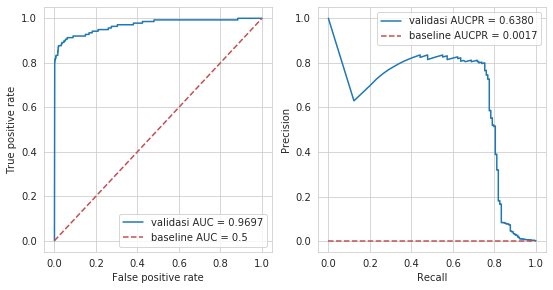

In [0]:

ifor4 = iForest(X_train3,best_ntree,best_samples,best_th)

y_pred = ifor4.predict(X_val)

y_pred = np.array(convert(y_pred))

ifval_scores = ifor4.score_samples(X_val)

ifval_scores = -ifval_scores

val_predictions = pd.DataFrame({

    "predicted_class": y_pred,

    "class": y_val,

    "predict": ifval_scores

})

figure()
axes = prediction_summary(

    val_predictions["class"], val_predictions["predict"], val_predictions["predicted_class"],'validasi')

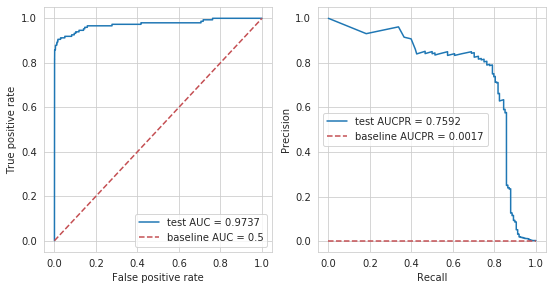

In [0]:
testing4 = []
iftest_predict = ifor4.predict(Xtest_new)

iftest_scores = ifor4.score_samples(Xtest_new)

roc_auc, aucpr = roc_aucpr(ytest, -iftest_scores)
  
precision,recall,f1_score = metric_evaluasi(ytest,np.array(convert(iftest_predict)))

TP,FP,FN,TN = confussion_matrik(y_val,y_pred)

FPR = FP/(TN+FP)

result4 = [precision,recall,FPR,f1_score, roc_auc, aucpr]
testing4.append(result4)

test_predictions = pd.DataFrame({

    "predicted_class": list(map(lambda x: 1*(x == -1), iftest_predict)),

    "class": ytest,

    "predict": -iftest_scores

})

figure()
axes = prediction_summary(
    test_predictions["class"], test_predictions["predict"], test_predictions["predicted_class"],'test')

In [0]:
hasil_testing4 = pd.DataFrame(data= testing4, columns=['Precision','TPR','FPR','F1_Score', 'ROC_AUC', 'AUCPR'])
hasil_testing4

,Precision,TPR,FPR,F1_Score,ROC_AUC,AUCPR
0,0.807143,0.763514,0.000289,0.784722,0.97371,0.759228


In [0]:
#download file :
from google.colab import files
hasil_percobaan1.to_csv('hasil_percobaan1.csv')
!cp hasil_percobaan1.csv "drive/My Drive/Colab Notebooks/ULB/Percobaan Unsupervised/"

hasil_percobaan2.to_csv('hasil_percobaan2.csv')
!cp hasil_percobaan2.csv "drive/My Drive/Colab Notebooks/ULB/Percobaan Unsupervised/"

hasil_percobaan3.to_csv('hasil_percobaan3.csv')
!cp hasil_percobaan3.csv "drive/My Drive/Colab Notebooks/ULB/Percobaan Unsupervised/"

terbaik4.to_csv('hasil_percobaan4.csv')
!cp hasil_percobaan4.csv "drive/My Drive/Colab Notebooks/ULB/Percobaan Unsupervised/"

hasil_testing1.to_csv('hasil_testing1.csv')
!cp hasil_testing1.csv "drive/My Drive/Colab Notebooks/ULB/Percobaan Unsupervised/"

hasil_testing2.to_csv('hasil_testing2.csv')
!cp hasil_testing2.csv "drive/My Drive/Colab Notebooks/ULB/Percobaan Unsupervised/"

hasil_testing3.to_csv('hasil_testing3.csv')
!cp hasil_testing3.csv "drive/My Drive/Colab Notebooks/ULB/Percobaan Unsupervised/"

hasil_testing4.to_csv('hasil_testing4.csv')
!cp hasil_testing4.csv "drive/My Drive/Colab Notebooks/ULB/Percobaan Unsupervised/"


In [0]:
# trees = [10, 25, 50, 100, 150, 200]
# samples = [64, 128, 256, 512, 1024]
# ths = [0.0004, 0.0008, 0.001, 0.0015, 0.002]
# hasil5=[]
# num = 1
# for tree in trees:
#   for sample in samples:
#     for th in ths:
#       Xfraud = train3_fraud.sample(frac=1, random_state=1)
  
#       X_train3 = train3_normal.append(Xfraud)

#       X_train3 = X_train3.sort_index()

#       y_train3 = X_train3['Class']

#       X_train3 = X_train3.drop(['Class'], axis=1)
      
#       ifor5 = iForest(X_train3,tree,sample,th)

#       y_pred = ifor5.predict(X_val)

#       y_pred = np.array(convert(y_pred))

#       ifval_scores = ifor5.score_samples(X_val)

#       ifval_scores = -ifval_scores
      
#       roc_auc, aucpr = roc_aucpr(y_val, ifval_scores)
      
#       precision,recall,f1_score = metric_evaluasi(y_val,y_pred)
      
#       result = [tree,sample,th,precision,recall,f1_score, roc_auc, aucpr]
      
#       hasil5.append(result)
      
#       progress = (num/150)*100
      
#       num=num+1
      
#       print('Progress training : ', math.floor(progress),'%')

In [0]:
# hasil_percobaan5 = pd.DataFrame(data= hasil5, columns=['jumlah tree','sample','threshold','Precision','Recall','F1_Score','ROC_AUC','AUCPR'])
# hasil_percobaan5

In [0]:
# maxi = hasil_percobaan5['F1_Score'].max()
# terbaik5 = hasil_percobaan5[(hasil_percobaan5['F1_Score']== maxi)]
# terbaik5

In [0]:
# Xfraud = train3_fraud.sample(frac=1, random_state=1)
  
# X_train3 = train3_normal.append(Xfraud)

# X_train3 = X_train3.sort_index()

# y_train3 = X_train3['Class']

# X_train3 = X_train3.drop(['Class'], axis=1)

# ifor5 = iForest(X_train3,25,64,0.0015)

# y_pred = ifor5.predict(X_val)

# y_pred = np.array(convert(y_pred))

# ifval_scores = ifor5.score_samples(X_val)

# ifval_scores = -ifval_scores

# val_predictions = pd.DataFrame({

#     "predicted_class": y_pred,

#     "class": y_val,

#     "predict": ifval_scores

# })

# figure()
# axes = prediction_summary(

#     val_predictions["class"], val_predictions["predict"], val_predictions["predicted_class"],'validasi')

In [0]:
# testing5 = []
# iftest_predict = ifor5.predict(Xtest_new)

# iftest_scores = ifor5.score_samples(Xtest_new)

# roc_auc, aucpr = roc_aucpr(ytest, -iftest_scores)
  
# precision,recall,f1_score = metric_evaluasi(ytest,np.array(convert(iftest_predict)))

# result4 = [precision,recall,f1_score,roc_auc,aucpr]
# testing5.append(result4)

# test_predictions = pd.DataFrame({

#     "predicted_class": list(map(lambda x: 1*(x == -1), iftest_predict)),

#     "class": ytest,

#     "predict": -iftest_scores

# })

# figure()
# axes = prediction_summary(
#     test_predictions["class"], test_predictions["predict"], test_predictions["predicted_class"],'test')

In [0]:
# hasil_testing5 = pd.DataFrame(data= testing5, columns=['Precision','Recall','F1_Score','ROC_AUC','AUCPR'])
# hasil_testing5

In [0]:
# hasil_percobaan5.to_csv('ulb-tuning-hyperparameter100.csv')


In [0]:
# files.download('ulb-tuning-hyperparameter100.csv')